### 4.1 Understanding of the data
##### Importing the necessary libraries and loading the datasets

In [1]:
#import the necessary libraries
import pandas as pd

In [2]:
raw_data = pd.read_csv('credit_card_default.csv')
raw_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37.0,0,0,0,0,...,19394.0,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29.0,0,0,0,0,...,542653.0,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23.0,0,-1,-1,0,...,221.0,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28.0,0,0,2,0,...,12211.0,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35.0,-2,-2,-2,-2,...,0.0,13007,13912,0,0,0,13007,1122,0,0


It is essential that you eyeball data first, ie start from left to right and top to bottom. By doing so, you check for errors like importing the wrong or incomplete data.

In [3]:
df = raw_data.copy()
# you make a copy of the original data so 
# that you dont make unnecessary mistakes on them
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


1. default_payment_next_month is likely the target variable, as it indicates whether the customer will default on their credit card payment in the next month.

In [4]:
#summary statistics for numerical features
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29997.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,29996.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485082,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43254.798973,40311.400967,38871.760400,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217423,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64310.642233,60797.155770,59554.107537,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2324.500000,1763.000000,1256.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# to display all columns of the DataFrame do this:
# pd.options.display.max_columns = None
# to see all the columns at once

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24.0,2,2,-1,-1,-2,-2,3913,3102,689,0.0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,0,2,2682,1725,2682,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,0,0,29239,14027,13559,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,0,0,46990,48233,49291,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,0,0,8617,5670,35835,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29997 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  object 
 13  BILL_AMT2                   300

In [8]:
# dropping it since it doesn't have any role in predicting the target
df=df.drop('ID', axis=1)

##### Using descriptive statistics to analyze the data

In [9]:
data_summary = df.describe()
print("Data Summary:\n", data_summary)

Data Summary:
             LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  29997.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485082   
std     129747.661567      0.489129      0.790349      0.521970      9.217423   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.12380

In [10]:
# use .info to get concise suummary of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         29997 non-null  float64
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  object 
 12  BILL_AMT2                   30000 non-null  object 
 13  BILL_AMT3                   300

In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24.0,2,2,-1,-1,-2,-2,3913,3102,689,0.0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26.0,-1,2,0,0,0,2,2682,1725,2682,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34.0,0,0,0,0,0,0,29239,14027,13559,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37.0,0,0,0,0,0,0,46990,48233,49291,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57.0,-1,0,-1,0,0,0,8617,5670,35835,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df['default_payment_next_month']

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [13]:
print(df['default_payment_next_month'].max())
print(df['default_payment_next_month'].min())



1
0


In [14]:
print(df['default_payment_next_month'].unique())


[1 0]


In [15]:
len(df['default_payment_next_month'].unique())

2

In [16]:
sorted(df['default_payment_next_month'].unique(),)

[0, 1]

Since the target has only two distinct numbers; 1 and 0, there is no need to create a dummy variable.

2. Potential Bias Introduced by the 'MARRIAGE' Feature:

a. Representation Bias: The data is imbalanced, with many more individuals labeled as married compared to single or separated. This imbalance may cause the model to focus on the larger group and perform poorly on predictions for less-represented groups.

b. Prejudicial Bias: The model could learn societal stereotypes, such as associating divorced individuals with higher credit risk, which can lead to unfair predictions based on marital status rather than true financial behavior.

c. Proxy Bias: Marital status may serve as a proxy for other variables, like income or financial responsibilities. If the model correlates being married with lower risk, it might overlook more relevant factors.

d. Spurious Correlation: The model could detect a relationship between marital status and credit risk that isn't genuinely significant, resulting in inaccurate predictions for new data.

e. Imbalanced Distribution: The unequal number of observations for each marital status may skew predictions, favoring outcomes based on the more common groups.

### 4.2 Data preprocessing
##### 1. Handling missing values

In [17]:

# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

#  among the various methods of handling missing values,
# dropping the missing values is best here since
# the number of missing values is small and won't affect the target prediction

# Drop rows with missing values
df = df.dropna()

# Or drop columns with missing values
df = df.dropna(axis=1)


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           3
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     4
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      3
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29990 non-null  int64  
 1   SEX                         29990 non-null  int64  
 2   EDUCATION                   29990 non-null  int64  
 3   MARRIAGE                    29990 non-null  int64  
 4   AGE                         29990 non-null  float64
 5   PAY_0                       29990 non-null  int64  
 6   PAY_2                       29990 non-null  int64  
 7   PAY_3                       29990 non-null  int64  
 8   PAY_4                       29990 non-null  int64  
 9   PAY_5                       29990 non-null  int64  
 10  PAY_6                       29990 non-null  int64  
 11  BILL_AMT1                   29990 non-null  object 
 12  BILL_AMT2                   29990 non-null  object 
 13  BILL_AMT3                   29990 no

In [19]:
# checkpoint
df_cleaned = df.copy()

In [ ]:
# Separating numerical and categorical features
numerical_data = df_cleaned.select_dtypes(include=['int64', 'float64'])
categorical_data = df_cleaned.select_dtypes(include=['object'])

categorical_data.head()

,BILL_AMT1,BILL_AMT2,PAY_AMT1
0,3913,3102,0
1,2682,1725,0
2,29239,14027,1518
3,46990,48233,2000
4,8617,5670,2000


In [21]:
numerical_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24.0,2,2,-1,-1,-2,-2,689,0.0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26.0,-1,2,0,0,0,2,2682,3272.0,3455,3261,1000,1000,1000,0,2000,1
2,90000,2,2,2,34.0,0,0,0,0,0,0,13559,14331.0,14948,15549,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37.0,0,0,0,0,0,0,49291,28314.0,28959,29547,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57.0,-1,0,-1,0,0,0,35835,20940.0,19146,19131,36681,10000,9000,689,679,0


In [22]:
df_unscaled = df_cleaned.copy()

2. ##### Standardization of numerical features

In [23]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
# standardize to get mean of 0 and stdv of 1

In [24]:
numerical_data.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month'],
      dtype=object)

In [25]:
categorical_data.columns.values

array(['BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1'], dtype=object)

In [26]:
numerical_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month']

In [27]:
categorical_columns = ['BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1']

In [28]:
# initializing the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_unscaled[numerical_columns] = scaler.fit_transform(df_unscaled[numerical_columns])


In [29]:
numerical_scaled = df_unscaled[numerical_columns]

In [30]:
numerical_scaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,-1.136812,0.810159,0.186016,-1.057315,-1.246017,1.794581,1.782379,-0.696483,-0.666427,-1.529807,-1.485837,-0.668048,-0.672553,-0.663131,-0.652803,-0.227092,-0.296729,-0.308052,-0.314086,-0.293372,1.876885
1,-0.365980,0.810159,0.186016,0.858514,-1.029048,-0.874816,1.782379,0.139051,0.188888,0.235004,1.992240,-0.639300,-0.621677,-0.606282,-0.598024,-0.213596,-0.239922,-0.244229,-0.314086,-0.180884,1.876885
2,-0.597229,0.810159,0.186016,0.858514,-0.161168,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,-0.482404,-0.449720,-0.417174,-0.391606,-0.191899,-0.239922,-0.244229,-0.248641,-0.012152,-0.532798
3,-0.905562,0.810159,0.186016,-1.057315,0.164286,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,0.033015,-0.232298,-0.186634,-0.156463,-0.169377,-0.228561,-0.237846,-0.244126,-0.237128,-0.532798
4,-0.905562,-1.234326,0.186016,-1.057315,2.333985,-0.874816,0.111851,-0.696483,0.188888,0.235004,0.253201,-0.161082,-0.346957,-0.348099,-0.331435,1.334780,0.271337,0.266354,-0.268994,-0.255182,-0.532798


3. ##### Using label encoding to encode the categorical variables

In [31]:
# import the necessary libraries
from sklearn.preprocessing import LabelEncoder

label_encoder =  LabelEncoder()

In [32]:
# applying label encoding to the categorical variables
df_unscaled['BILL_AMT1'] = label_encoder.fit_transform(df_unscaled['BILL_AMT1'])
df_unscaled['BILL_AMT2'] = label_encoder.fit_transform(df_unscaled['BILL_AMT2'])
df_unscaled['PAY_AMT1'] = label_encoder.fit_transform(df_unscaled['PAY_AMT1'])

In [33]:
df_unscaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,-1.136812,0.810159,0.186016,-1.057315,-1.246017,1.794581,1.782379,-0.696483,-0.666427,-1.529807,-1.485837,13339,11399,-0.668048,-0.672553,-0.663131,-0.652803,0,-0.227092,-0.296729,-0.308052,-0.314086,-0.293372,1.876885
1,-0.365980,0.810159,0.186016,0.858514,-1.029048,-0.874816,1.782379,0.139051,0.188888,0.235004,1.992240,10024,5549,-0.639300,-0.621677,-0.606282,-0.598024,0,-0.213596,-0.239922,-0.244229,-0.314086,-0.180884,1.876885
2,-0.597229,0.810159,0.186016,0.858514,-0.161168,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,10918,3479,-0.482404,-0.449720,-0.417174,-0.391606,1494,-0.191899,-0.239922,-0.244229,-0.248641,-0.012152,-0.532798
3,-0.905562,0.810159,0.186016,-1.057315,0.164286,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,15018,15164,0.033015,-0.232298,-0.186634,-0.156463,2415,-0.169377,-0.228561,-0.237846,-0.244126,-0.237128,-0.532798
4,-0.905562,-1.234326,0.186016,-1.057315,2.333985,-0.874816,0.111851,-0.696483,0.188888,0.235004,0.253201,21259,16954,-0.161082,-0.346957,-0.348099,-0.331435,2415,1.334780,0.271337,0.266354,-0.268994,-0.255182,-0.532798


In [34]:
df_unscaled[categorical_columns].head()

,BILL_AMT1,BILL_AMT2,PAY_AMT1
0,13339,11399,0
1,10024,5549,0
2,10918,3479,1494
3,15018,15164,2415
4,21259,16954,2415


In [35]:
df_scaled = df_unscaled.copy()

4. Potential consequences of removing NaN ethically wise include:

Exclusion of Vulnerable Groups: If certain demographic groups (e.g., specific age ranges, income levels, or geographic locations) are more likely to have missing data, removing these records may disproportionately exclude those groups from the analysis, potentially reinforcing existing inequalities.

Biased Model Performance: When the missing values are not randomly distributed across the data, their removal can bias the model's training data, leading to skewed predictions that don't accurately reflect the entire population. This can result in unfair treatment or discrimination against certain groups.

Loss of Important Information: Dropping rows with missing values can reduce the dataset's size significantly, leading to a loss of potentially valuable information and limiting the model's ability to generalize well. This may especially be problematic if the missing data contain patterns that are relevant to predicting the target variable.

Reinforcing Existing Inequities: If the missing values are systematically associated with lower socio-economic status or other marginalized characteristics, removing them may perpetuate inequities by ignoring the experiences of these groups in the analysis, potentially leading to less inclusive solutions.

Unfair Decision-Making: In credit scoring, for example, removing records with missing values may result in biased risk assessments that disproportionately affect applicants with limited financial history or those from underrepresented backgrounds, leading to unfair credit decisions.

### 4.3 Exploratory Data Analysis

1. Visualise the distribution of target value and the correlation between features and the target variable. Identify the features
that are most strongly correlated. 

In [36]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

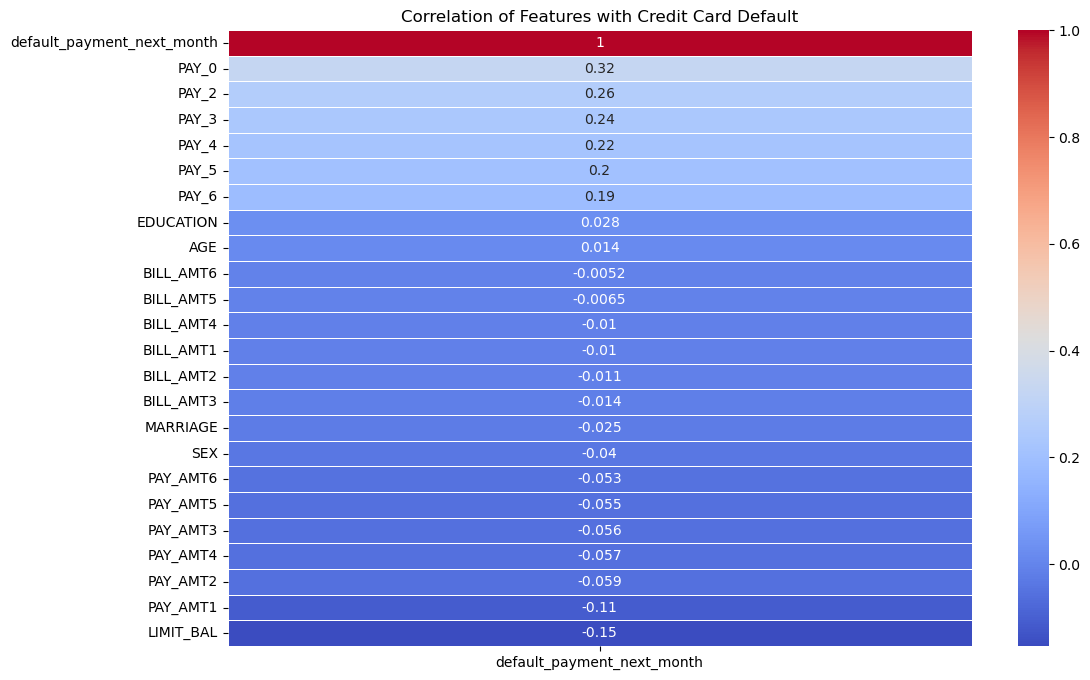

In [37]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Plot the heatmap for correlation with the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['default_payment_next_month']].sort_values(by='default_payment_next_month', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Credit Card Default')
plt.show()

# the heatmap is a good fit for this visualization because it identifies and shows the correlation between the features.

### Observations from the Correlation Heatmap

1. **PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6**:
   - These features, representing the repayment status for different months, show the strongest positive correlation with the target variable (`default_payment_next_month`).
   - `PAY_0` (the most recent repayment status) has the highest correlation (~0.32), followed by `PAY_2` (0.26), `PAY_3` (0.24), and so on.
   - This indicates that as the values for these features increase (i.e., indicating delayed payments), the likelihood of defaulting also increases.

2. **LIMIT_BAL**:
   - The credit limit (`LIMIT_BAL`) has a negative correlation with the target variable (-0.15).
   - This suggests that individuals with higher credit limits tend to have a lower likelihood of defaulting.

3. **PAY_AMT1 to PAY_AMT6**:
   - The payment amounts for the past six months show weak negative correlations with the target variable.
   - This implies that higher payment amounts are associated with a reduced likelihood of default.

4. **Demographic features (SEX, MARRIAGE, AGE, EDUCATION)**:
   - These features exhibit very weak correlations with the target variable.
   - It indicates that demographic factors have minimal linear relationships with the likelihood of defaulting in this dataset.

### Conclusion
- The repayment status (`PAY_X` features) and payment amounts (`PAY_AMT_X` features) have the most significant relationships with credit card default risk.
- Demographic factors, on the other hand, appear to have limited impact based on their linear correlations.
- It's important to note that correlations only capture linear relationships; further analysis may be needed to uncover more complex patterns in the data.


In [38]:
df_scaled.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,0.024557,-0.219293,-0.107895,0.144825,-0.271201,-0.296399,-0.286253,-0.267470,-0.249467,-0.235270,-0.085446,-0.085162,0.283078,0.293841,0.295410,0.290235,0.127375,0.178441,0.210209,0.203273,0.217240,0.219585,-0.153491
SEX,0.024557,1.000000,0.014135,-0.031269,-0.090972,-0.057634,-0.070745,-0.066117,-0.060143,-0.054980,-0.043959,-0.008741,-0.017993,-0.024699,-0.021999,-0.017126,-0.016873,0.008111,-0.001399,-0.008467,-0.002242,-0.001714,-0.002804,-0.039978
EDUCATION,-0.219293,0.014135,1.000000,-0.143532,0.175148,0.105368,0.121563,0.114011,0.108774,0.097569,0.082362,0.030365,0.039091,0.013024,-0.000430,-0.007549,-0.009090,-0.019756,-0.030008,-0.039955,-0.038188,-0.040340,-0.037173,0.027740
MARRIAGE,-0.107895,-0.031269,-0.143532,1.000000,-0.414212,0.019821,0.024084,0.032637,0.033009,0.035564,0.034250,0.014339,0.011771,-0.024706,-0.023202,-0.025244,-0.021050,-0.019005,-0.008086,-0.003613,-0.012649,-0.001138,-0.006604,-0.024559
AGE,0.144825,-0.090972,0.175148,-0.414212,1.000000,-0.039503,-0.050164,-0.053120,-0.049738,-0.053754,-0.048690,-0.023181,-0.020147,0.053853,0.051507,0.049497,0.047765,0.009671,0.021803,0.029334,0.021387,0.022804,0.019505,0.014058
PAY_0,-0.271201,-0.057634,0.105368,0.019821,-0.039503,1.000000,0.672101,0.574189,0.538742,0.509388,0.474511,-0.008867,0.056160,0.179936,0.179269,0.180782,0.177129,-0.117571,-0.070088,-0.070559,-0.063995,-0.058171,-0.058649,0.324706
PAY_2,-0.296399,-0.070745,0.121563,0.024084,-0.050164,0.672101,1.000000,0.766532,0.661985,0.622748,0.575466,0.186041,0.188654,0.224288,0.222373,0.221487,0.219555,-0.092765,-0.058980,-0.055914,-0.046851,-0.037044,-0.036479,0.263416
PAY_3,-0.286253,-0.066117,0.114011,0.032637,-0.053120,0.574189,0.766532,1.000000,0.777335,0.686779,0.632680,0.141382,0.221385,0.227583,0.227298,0.225236,0.222436,0.075871,-0.066773,-0.053322,-0.046055,-0.035810,-0.035833,0.235143
PAY_4,-0.267470,-0.060143,0.108774,0.033009,-0.049738,0.538742,0.661985,0.777335,1.000000,0.819844,0.716444,0.127360,0.178077,0.245130,0.246061,0.243047,0.239309,0.045409,-0.001923,-0.069264,-0.043452,-0.033540,-0.026539,0.216439
PAY_5,-0.249467,-0.054980,0.097569,0.035564,-0.053754,0.509388,0.622748,0.686779,0.819844,1.000000,0.816882,0.122390,0.167046,0.243433,0.272026,0.269900,0.262638,0.034584,-0.003180,0.009048,-0.058292,-0.033296,-0.023012,0.204051


### 2. Interpretation
The obtained heatmap shows that both gender and marital status have very weak correlations with default rates, indicating no significant disparities in default behavior based on these features. EDA does not reveal notable differences in default rates for gender or marital status, suggesting that these factors alone do not strongly influence default risk.


In [39]:
df_scaled.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,29990.000000,29990.000000,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,29990.000000,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04,2.999000e+04
mean,-5.686237e-17,-2.217633e-16,-1.061431e-16,2.198678e-16,1.800642e-16,-4.169907e-17,4.548990e-17,1.611101e-17,-1.421559e-17,2.843119e-17,3.980366e-17,10567.891464,10184.455885,5.781008e-17,3.980366e-17,-2.227110e-17,5.307155e-17,2899.521741,6.633944e-18,-1.705871e-17,9.477062e-18,-2.037568e-17,-1.267557e-17,8.718897e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,6894.076287,6838.769172,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,2370.659537,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213895e+00,-1.234326e+00,-2.344545e+00,-2.973145e+00,-1.571472e+00,-1.764615e+00,-1.558676e+00,-1.532017e+00,-1.521742e+00,-1.529807e+00,-1.485837e+00,0.000000,0.000000,-2.946453e+00,-3.315887e+00,-2.001416e+00,-6.357566e+00,0.000000,-2.569913e-01,-2.967286e-01,-3.080516e-01,-3.140855e-01,-2.933715e-01,-5.327978e-01
25%,-9.055623e-01,-1.234326e+00,-1.079264e+00,-1.057315e+00,-8.120777e-01,-8.748156e-01,-7.234125e-01,-6.964828e-01,-6.664270e-01,-6.474015e-01,-6.163177e-01,4424.250000,4006.250000,-6.395705e-01,-6.364564e-01,-6.341346e-01,-6.317048e-01,669.000000,-2.208758e-01,-2.745740e-01,-2.892079e-01,-2.976590e-01,-2.867347e-01,-5.327978e-01
50%,-2.118131e-01,8.101586e-01,1.860161e-01,8.585138e-01,-1.611683e-01,1.498328e-02,1.118513e-01,1.390514e-01,1.888880e-01,2.350041e-01,2.532014e-01,10621.500000,10165.500000,-3.882475e-01,-3.763290e-01,-3.652690e-01,-3.660980e-01,2444.000000,-1.698108e-01,-1.944767e-01,-2.123173e-01,-2.159191e-01,-2.090056e-01,-5.327978e-01
75%,5.590194e-01,8.101586e-01,1.860161e-01,8.585138e-01,5.982261e-01,1.498328e-02,1.118513e-01,1.390514e-01,1.888880e-01,2.350041e-01,2.532014e-01,16455.750000,16030.750000,1.898246e-01,1.748489e-01,1.626019e-01,1.735021e-01,4752.000000,-4.001639e-02,-4.081484e-02,-5.188263e-02,-5.027960e-02,-6.839578e-02,-5.327978e-01
max,6.417346e+00,8.101586e-01,5.247138e+00,2.774343e+00,4.720653e+00,7.133375e+00,6.793961e+00,6.823325e+00,7.031408e+00,7.294250e+00,7.209355e+00,22715.000000,22338.000000,2.332579e+01,1.319074e+01,1.459271e+01,1.550154e+01,7943.000000,7.283139e+01,5.060426e+01,3.932594e+01,2.759980e+01,2.944088e+01,1.876885e+00


### 3. Ensuring Security and Privacy of Sensitive Data

1. **Data Anonymization**: Remove or mask personally identifiable information (PII) such as names or credit card numbers. Use anonymized or aggregated data to minimize exposure of sensitive information.

2. **Encryption**: Encrypt the dataset both in transit and at rest to ensure that sensitive data cannot be accessed or modified without proper authorization.

3. **Access Control**: Implement strict access controls to limit who can access the dataset. Use role-based permissions to restrict access to only those who need it.

4. **Data Minimization**: Retain only the data that is necessary for analysis. Avoid collecting or processing unnecessary sensitive information.

5. **Compliance with Data Protection Regulations**: Follow legal requirements and industry standards (such as GDPR or PCI-DSS) to ensure that the handling of sensitive data meets established data protection guidelines.


### 4.4. Model development and evaluation

##### Create the targets

In [40]:
# find the median of 'default_payment_next_month'
df_scaled['default_payment_next_month'].median()

-0.5327977603996461

In [41]:
# Assuming 'data' is your DataFrame containing all features and the target variable
# Define X as all features except the target column
X = df_scaled.drop(columns=['default_payment_next_month'])

# Define y as the target column
y = df_scaled['default_payment_next_month']

### 1. Training the model using a machine learning algorithm.

In [42]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

# Splitting the Data: 
#    - `X_train` and `X_test` represent the features for the training and testing datasets, respectively.
#    - `y_train` and `y_test` represent the target variable (labels) for the training and testing datasets, respectively.
#    - `test_size=0.2` indicates that 20% of the data will be used for testing, while the remaining 80% will be used for training.
#    - `random_state=42` is used to ensure reproducibility. It sets a seed for the random number generator, making sure the split is the same every time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25049,-0.905562,-1.234326,1.451296,0.858514,2.008530,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,19927,19729,0.457112,0.564263,-0.338358,-0.320885,3503,-0.123855,-0.165562,-0.263759,-0.267227,-0.247926
628,-1.059729,-1.234326,1.451296,-1.057315,1.357620,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,11002,10696,-0.259357,-0.218506,-0.176860,-0.154011,1355,-0.170201,-0.238047,-0.231464,-0.245042,-0.263562
17096,-0.751396,0.810159,-1.079264,0.858514,-1.246017,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,19311,18034,0.263188,0.306382,0.393376,0.346395,3630,-0.126806,-0.172322,-0.167578,-0.171352,-0.157655
22599,0.559019,0.810159,2.716577,-1.057315,0.815196,-1.764615,-1.558676,-1.532017,-1.521742,-1.529807,-1.485837,14588,6448,-0.574389,-0.573071,-0.622028,-0.594580,2193,0.055800,0.069674,-0.148622,-0.087256,-0.172110
13047,1.406935,0.810159,1.451296,-1.057315,1.574590,-0.874816,-0.723413,-0.696483,-0.666427,-0.647402,-0.616318,13720,11445,-0.187061,-0.654563,-0.521888,-0.617930,3938,1.219913,-0.231003,0.239804,-0.178223,0.058997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29812,0.250686,-1.234326,0.186016,-1.057315,0.164286,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,4148,4587,1.293636,1.464380,1.608518,1.474117,3737,1.044858,-0.061095,0.655673,0.211367,0.550512
5400,2.563184,0.810159,0.186016,0.858514,1.466105,-0.874816,-0.723413,-0.696483,0.188888,0.235004,-0.616318,10426,21269,4.878764,5.407845,-0.663131,-0.650284,7602,16.459969,0.147556,-0.308052,-0.304269,-0.272955
870,-1.136812,0.810159,0.186016,2.774343,1.791560,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,3928,4565,-0.438135,-0.408873,-0.378243,-0.356078,874,-0.201576,-0.262247,-0.267907,-0.272332,-0.257319
15805,-1.059729,0.810159,1.451296,-1.057315,-1.354502,0.014983,0.111851,1.810120,0.188888,0.235004,0.253201,10298,11303,-0.246476,-0.206176,-0.213767,-0.186180,4401,-0.256904,-0.198396,-0.238293,-0.246940,-0.182908


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier model with a fixed random state for reproducibility.
model = RandomForestClassifier(random_state=42)

# Training the model using the training data (X_train for features, y_train for target labels).
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29990 non-null  float64
 1   SEX                         29990 non-null  float64
 2   EDUCATION                   29990 non-null  float64
 3   MARRIAGE                    29990 non-null  float64
 4   AGE                         29990 non-null  float64
 5   PAY_0                       29990 non-null  float64
 6   PAY_2                       29990 non-null  float64
 7   PAY_3                       29990 non-null  float64
 8   PAY_4                       29990 non-null  float64
 9   PAY_5                       29990 non-null  float64
 10  PAY_6                       29990 non-null  float64
 11  BILL_AMT1                   29990 non-null  int32  
 12  BILL_AMT2                   29990 non-null  int32  
 13  BILL_AMT3                   29990 no

In [46]:
# Convert all numerical columns to float
df_scaled = df_scaled.astype(float)


In [47]:
# converting the element of the target to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [49]:
print(y_train.unique())


[0 1]


In [54]:
# obtaining the model's accuracy
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 82.04%


### Model Accuracy

The model achieved an accuracy of **82.04%**, indicating that approximately 82 out of 100 predictions made by the model are correct. This metric gives an initial indication of the model's performance in predicting credit card default risk.


### 2. How to address model's fairness issue
If the model is found to be over-penalizing certain demographic groups, the best course of action is to reassess and mitigate the bias in the model. The following steps can be taken to improve fairness:

1. **Identify the Bias Source:** Analyze the data and the model's decision-making process to understand how and where the bias is occurring. Check if certain demographic groups are being disproportionately penalized due to imbalances in the training data or model design.
2. **Rebalance the Training Data**: Ensure the dataset is representative across demographic groups by using techniques like oversampling or synthetic data generation.
2. **Fairness-aware Algorithms**: Implement algorithms that incorporate fairness constraints or modify the learning process to reduce bias.
3. **Bias Mitigation Techniques**: Use techniques such as fairness-aware learning algorithms or bias-mitigation techniques like adversarial debiasing, reweighting, or regularization that specifically aim to reduce discriminatory outcomes.
4. **Evaluate Fairness Metrics**: Use fairness metrics like demographic parity and equalized odds to detect and address any disparities.
5. **Continuous Monitoring and Feedback**: Once the model is updated, monitor its performance regularly to ensure that it remains fair and bias-free over time. Solicit feedback from stakeholders to catch any emerging biases early.

These approaches help ensure the model's predictions are equitable across different groups.
